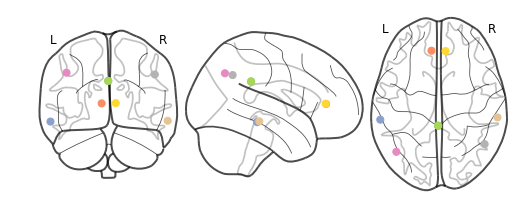

In [1]:
"""
Reference: 

http://nilearn.github.io/auto_examples/01_plotting/plot_surf_stat_map.html#sphx-glr-auto-examples-01-plotting-plot-surf-stat-map-py 

and
http://nilearn.github.io/auto_examples/01_plotting/plot_surf_atlas.html?highlight=destrieux
"""

#NKI resting state data from nilearn
from nilearn import datasets

# Load resting state time series from nilearn
from nilearn import surface

import numpy as np

# Extract seed region via label
pcc_region = b'G_cingul-Post-dorsal'
acc_region = b'G_and_S_cingul-Ant'
mtg_region = b'G_temporal_middle'
ag_region = b'G_pariet_inf-Angular'

# Destrieux parcellation for left hemisphere in fsaverage5 space
destrieux_atlas = datasets.fetch_atlas_surf_destrieux()
labels = destrieux_atlas['labels']

# Fsaverage5 surface template
fsaverage = datasets.fetch_surf_fsaverage()
regions = [pcc_region, acc_region, mtg_region, ag_region]

coordinates = []
for hemi in ['left', 'right']:
    vert = destrieux_atlas['map_%s' % hemi]
    rr, _ = surface.load_surf_mesh(fsaverage['pial_%s' % hemi])
    for region in regions:
        if "Unknown" not in str(region):  # Omit the Unknown label.
            # Compute mean location of vertices in label of index k
            coordinates.append(np.mean(rr[vert == labels.index(region)], axis=0))


# Combine left_PCC with right_PCC as one region(PCC)
coordinates[0] =  np.mean([coordinates[0],coordinates[len(coordinates)//2]],axis=0)
coordinates[len(coordinates)//2] =  coordinates[0]



coordinates = np.array(coordinates)  # 3D coordinates of parcels

n_parcels = len(coordinates)
corr = np.zeros((n_parcels, n_parcels))

from nilearn import plotting
fig = plotting.plot_connectome(corr,coordinates)
fig.savefig('brain.pdf')
plotting.show()

In [2]:
#NKI resting state data from nilearn
from nilearn import datasets

nki_dataset = datasets.fetch_surf_nki_enhanced(n_subjects=1)

# The nki dictionary contains file names for the data
# # of all downloaded subjects.
# print(('Resting state data of the first subjects on the '
#        'fsaverag5 surface left hemisphere is at: %s' %
#       nki_dataset['func_left'][0]))

# Destrieux parcellation for left hemisphere in fsaverage5 space
destrieux_atlas = datasets.fetch_atlas_surf_destrieux()
labels = destrieux_atlas['labels']

# Fsaverage5 surface template
fsaverage = datasets.fetch_surf_fsaverage()
# Load resting state time series from nilearn
from nilearn import surface

# Extract seed region via label
pcc_region = b'G_cingul-Post-dorsal'
acc_region = b'G_and_S_cingul-Ant'
mtg_region = b'G_temporal_middle'
ag_region = b'G_pariet_inf-Angular'
# mfg_region = b'G_front_middle'


import numpy as np

for hemi in ['left', 'right']:

    timeseries = surface.load_surf_data(nki_dataset['func_%s' % hemi][0])  #shape(10242,895)

    parcellation = destrieux_atlas['map_%s' % hemi] #shape(10242,) , every entry in the scale of (0,75]

    pcc_labels = np.where(parcellation == labels.index(pcc_region))[0] #(66,)
    acc_labels = np.where(parcellation == labels.index(acc_region))[0] #(167,)
    mtg_labels = np.where(parcellation == labels.index(mtg_region))[0] #(183,)
    ag_labels = np.where(parcellation == labels.index(ag_region))[0] #(171,)
    # mfg_labels = np.where(parcellation == labels.index(mfg_region))[0] #(269,)
    
    if hemi == 'left':
        left_pcc_timeseries =  timeseries[pcc_labels]
        print("left_pcc_timeseries's shape:",left_pcc_timeseries.shape)
        left_acc_timeseries =  timeseries[acc_labels]
        print("left_acc_timeseries's shape:",left_acc_timeseries.shape)
        left_mtg_timeseries =  timeseries[mtg_labels]
        print("left_mtg_timeseries's shape:",left_mtg_timeseries.shape)
        left_ag_timeseries =  timeseries[ag_labels]
        print("left_ag_timeseries's shape:",left_ag_timeseries.shape)
    else:
        right_pcc_timeseries =  timeseries[pcc_labels]
        print("right_pcc_timeseries's shape:",right_pcc_timeseries.shape)
        right_acc_timeseries =  timeseries[acc_labels]
        print("right_acc_timeseries's shape:",right_acc_timeseries.shape)
        right_mtg_timeseries =  timeseries[mtg_labels]
        print("right_mtg_timeseries's shape:",right_mtg_timeseries.shape)
        right_ag_timeseries =  timeseries[ag_labels]
        print("right_ag_timeseries's shape:",right_ag_timeseries.shape)

    
# Combine left_PCC with right_PCC as one region(PCC)
pcc_timeseries = np.vstack((left_pcc_timeseries,right_pcc_timeseries))
print("pcc_timeseries's shape:",pcc_timeseries.shape)


left_pcc_timeseries's shape: (66, 895)
left_acc_timeseries's shape: (167, 895)
left_mtg_timeseries's shape: (183, 895)
left_ag_timeseries's shape: (171, 895)
right_pcc_timeseries's shape: (50, 895)
right_acc_timeseries's shape: (191, 895)
right_mtg_timeseries's shape: (188, 895)
right_ag_timeseries's shape: (242, 895)
pcc_timeseries's shape: (116, 895)


In [8]:
"""
Save the mean value of each ROI
"""
mean_pcc = np.mean(pcc_timeseries,axis=0)
mean_lacc = np.mean(left_acc_timeseries,axis=0)
mean_lmtg = np.mean(left_mtg_timeseries,axis=0)
mean_lag = np.mean(left_ag_timeseries,axis=0)
mean_racc = np.mean(right_acc_timeseries,axis=0)
mean_rmtg = np.mean(right_mtg_timeseries,axis=0)
mean_rag = np.mean(right_ag_timeseries,axis=0)
mean_timeseries = np.vstack((mean_pcc,mean_lacc,mean_lmtg,mean_lag,mean_racc,mean_rmtg,mean_rag))
print(mean_timeseries.shape)
np.savetxt("mean_NKI_dataset.txt",mean_timeseries.T) 

(7, 895)


In [ ]:
"""
Let's transform the above timeseries into one array, and store in txt file.
the order of ROIs is: ROI's name (number of variables)
pcc (116)
left_acc (167) 
left_mtg (183)
left_ag (171)
right_acc (191) 
right_mtg (188) 
right_ag (242), 
7 ROIs in total and therefore,
The number of source variable in each region is [116, 167, 183, 171, 191, 188, 242].
"""

final_timeseries = np.vstack((pcc_timeseries,left_acc_timeseries,left_mtg_timeseries,left_ag_timeseries,
                                right_acc_timeseries,right_mtg_timeseries,right_ag_timeseries))
print("final_timeseries's shape: ",final_timeseries.shape) # (1258,895)

# Store in txt file with format (T,N), so transpose the final_timeseries
np.savetxt("NKI_dataset.txt",final_timeseries.T) 
print("final_timeseries.T's shape: ",final_timeseries.T.shape) # (895,1258)


# Test whether the data file works well
nki_timeseries = np.loadtxt("NKI_dataset.txt",skiprows=0)
print(nki_timeseries.shape) #(895, 1258)

# skipwors=1, skip the head
rhyming_timeseries = np.loadtxt("rhyming_concat_001.txt",skiprows=1)
print(rhyming_timeseries.shape) #(1440, 9)


In [ ]:
"""
 Compute the partial correlations between ROIs. 
 1. Yi = mean(Xi)
 2. Yi = AiXi ,learned from Network.

 results: not much difference.

"""

# plotting.plot_matrix(causality_matrix, labels=roi_labels, colorbar=True,vmin=-1,vmax=1,figure=(8,8))


# print(nki_timeseries.shape) #(895, 1258)

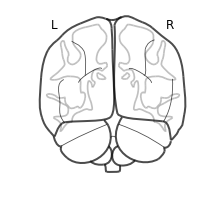

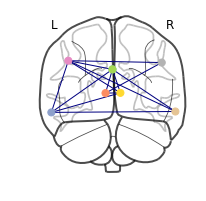

In [3]:
"""
Reference: 

http://nilearn.github.io/auto_examples/01_plotting/plot_surf_stat_map.html#sphx-glr-auto-examples-01-plotting-plot-surf-stat-map-py 

and
http://nilearn.github.io/auto_examples/01_plotting/plot_surf_atlas.html?highlight=destrieux
"""

#NKI resting state data from nilearn
from nilearn import datasets

# Load resting state time series from nilearn
from nilearn import surface

import numpy as np

# Extract seed region via label
pcc_region = b'G_cingul-Post-dorsal'
acc_region = b'G_and_S_cingul-Ant'
mtg_region = b'G_temporal_middle'
ag_region = b'G_pariet_inf-Angular'

# Destrieux parcellation for left hemisphere in fsaverage5 space
destrieux_atlas = datasets.fetch_atlas_surf_destrieux()
labels = destrieux_atlas['labels']

# Fsaverage5 surface template
fsaverage = datasets.fetch_surf_fsaverage()
regions = [pcc_region, acc_region, mtg_region, ag_region]

coordinates = []
for hemi in ['left', 'right']:
    vert = destrieux_atlas['map_%s' % hemi]
    rr, _ = surface.load_surf_mesh(fsaverage['pial_%s' % hemi])
    for region in regions:
        if "Unknown" not in str(region):  # Omit the Unknown label.
            # Compute mean location of vertices in label of index k
            coordinates.append(np.mean(rr[vert == labels.index(region)], axis=0))


# Combine left_PCC with right_PCC as one region(PCC)
coordinates[0] =  np.mean([coordinates[0],coordinates[len(coordinates)//2]],axis=0)
coordinates[len(coordinates)//2] =  coordinates[0]



coordinates = np.array(coordinates)  # 3D coordinates of parcels

n_parcels = len(coordinates)
corr = np.zeros((n_parcels, n_parcels))

# fill with 1 according the learned result
# corr[1,0] = corr[0,1] = 1
# corr[2,0] = corr[0,2] = 1
# corr[2,7] = corr[7,2] = 1
# corr[3,0] = corr[0,3] = 1
# corr[6,0] = corr[0,6] = 1
# corr[7,0] = corr[0,7] = 1


corr[1,0] = corr[0,1] = 1
corr[1,5] = corr[5,1] = 1
corr[1,7] = corr[7,1] = 1
corr[2,0] = corr[0,2] = 1
corr[2,3] = corr[3,2] = 1
corr[2,5] = corr[5,2] = 1
corr[2,6] = corr[6,2] = 1
corr[3,0] = corr[0,3] = 1
corr[3,2] = corr[2,3] = 1
corr[3,5] = corr[5,3] = 1
corr[3,6] = corr[6,3] = 1
corr[3,7] = corr[7,3] = 1
corr[5,0:4] = corr[0:4,5] = 1 
corr[5,5:8] = corr[8:5,5] = 1

from nilearn import plotting
import matplotlib.pyplot as plt

fig = plotting.plot_connectome(corr,coordinates,display_mode='y',edge_kwargs={'color':'navy','linewidth':1})
# fig.savefig('brain_causality.pdf')
plotting.show()

In [16]:
    # Make figures
    import numpy as np
    import matplotlib.pyplot as plt
    
    GC_est = np.identity(7)
    GC_est[(1,2,3,5,6),0] = GC_est[2,6] =  1
    roi_labels = ['PCC','LACC','LMTG','LAG','RACC','RMTG','RAG'] 
    fig, axarr = plt.subplots(1,1,dpi=1200, figsize=(7, 7))
    axarr.imshow(GC_est, cmap='Blues', vmin=0, vmax=1, extent=(0, len(roi_labels), len(roi_labels), 0))
    axarr.set_title('λ = 0.2')
    axarr.set_ylabel('Affected series')
    axarr.set_xlabel('Causal series')
    tick_marks = np.arange(len(roi_labels)) +0.5
    plt.xticks(tick_marks, roi_labels, rotation=45 )
    plt.yticks(tick_marks, roi_labels)
    # plt.show()
    plt.savefig('sensitivity(c).png')